#### based on Fig. 1 from Shipway & Hill 2012 (Q. J. Royal Meteo. Soc. 138)  "_Diagnosis of systematic differences between multiple parametrizations of warm rain microphysics using a kinematic framework_"   
https://doi.org/10.1002/qj.1913

**NOTES**: 
- constant momentum profile rather than constant velocity profile is used herein
- enabling precipitation interpretted as turning on sedimentation and collisions
- pressure at z=0 not given in the paper, assumed (see settings.py)
- domain extended below z=0 to mimic particle inflow

In [1]:
from settings import Settings 
from simulation import Simulation
from plot import plot
import numpy as np

from PySDM.initialisation.spectra import Lognormal
from PySDM.physics import si
from PySDM.exporters import NetCDFExporter_1d

/Users/hyfives-lamont/Desktop/cloud_seeding/PySDM/PySDM/backends/impl_numba/conf.py:19: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


In [2]:
common_params = {
    "n_sd_per_mode": (128, 128),
    "aerosol_modes_by_kappa": {
            .54: Lognormal(
                        norm_factor= 50 / si.cm ** 3,
                        m_mode=15 * si.nm,
                        s_geom=1.4
                ),
            .85: Lognormal(
                    norm_factor= 100/ si.cm ** 3,
                    m_mode= 40 * si.nm,
                    s_geom= 1.2
                )
            },
    "dt": 5 * si.s,
    "dz": 50 * si.m,
    "p0": 990 * si.hPa
}

In [3]:
output = {}
settings = {}
simulation = {}
for rho_times_w in (
    2 * si.kg/si.m**3 * si.m/si.s,
    3 * si.kg/si.m**3 * si.m/si.s
):
    for precip in (
        False, 
        True
    ):
        key = f"rhow={rho_times_w}_p={precip}"
        settings[key] = Settings(
            **common_params,
            rho_times_w_1=rho_times_w,
            precip=precip
        )
        simulation[key] = Simulation(settings[key])
        output[key] = simulation[key].run().products

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


In [12]:
simulation["rhow=2.0_p=True"].attributes

{'dry volume': array([2.95393123e-25, 3.80275071e-25, 4.33283289e-25, ...,
        1.77184570e-21, 1.90167124e-21, 2.18060169e-21]),
 'kappa times dry volume': array([1.59512286e-25, 2.05348538e-25, 2.33972976e-25, ...,
        1.50606885e-21, 1.61642055e-21, 1.85351144e-21]),
 'multiplicity': array([22234235, 19113730, 21921922, ..., 41417959, 41088767, 44468469]),
 'cell id': array([ 7, 42, 42, ..., 11, 28, 31]),
 'cell origin': array([[ 7, 42, 42, ..., 11, 28, 31]]),
 'position in cell': array([[0.04679442, 0.66643869, 0.90300366, ..., 0.9795265 , 0.11254069,
         0.15216944]]),
 'water mass': array([3.54077126e-22, 5.17493711e-22, 6.06810218e-22, ...,
        6.84346755e-18, 8.98395802e-16, 1.19509775e-16])}

In [21]:
simulation= Simulation(settings["rhow=2.0_p=True"])
output= simulation.run().products

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


In [29]:
simulation.attributes

{'dry volume': array([2.95393123e-25, 3.80275071e-25, 4.33283289e-25, ...,
        1.77184570e-21, 1.90167124e-21, 2.18060169e-21]),
 'kappa times dry volume': array([1.59512286e-25, 2.05348538e-25, 2.33972976e-25, ...,
        1.50606885e-21, 1.61642055e-21, 1.85351144e-21]),
 'multiplicity': array([17483097, 18506221, 20380936, ..., 44468469, 36123211, 44468469]),
 'cell id': array([ 7, 42, 42, ..., 11, 28, 31]),
 'cell origin': array([[ 7, 42, 42, ..., 11, 28, 31]]),
 'position in cell': array([[0.04679442, 0.66643869, 0.90300366, ..., 0.9795265 , 0.11254069,
         0.15216944]]),
 'water mass': array([3.54077126e-22, 5.17493711e-22, 6.06810218e-22, ...,
        6.84346755e-18, 8.98395802e-16, 1.19509775e-16])}

In [33]:
output['rhod'].shape

(73, 721)

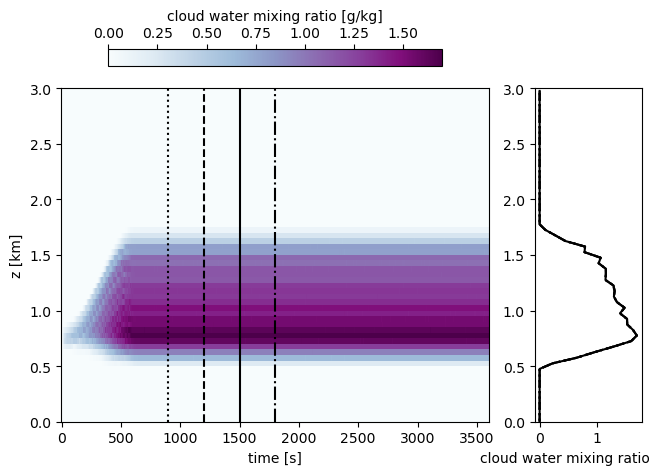

HTML(value="<a href='./qc_rhow=2_p=False.pdf' target='_blank'>./qc_rhow=2_p=False.pdf</a><br>")

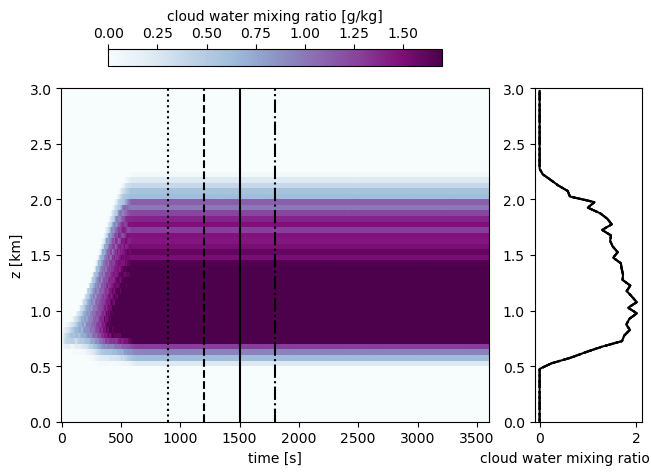

HTML(value="<a href='./qc_rhow=3_p=False.pdf' target='_blank'>./qc_rhow=3_p=False.pdf</a><br>")

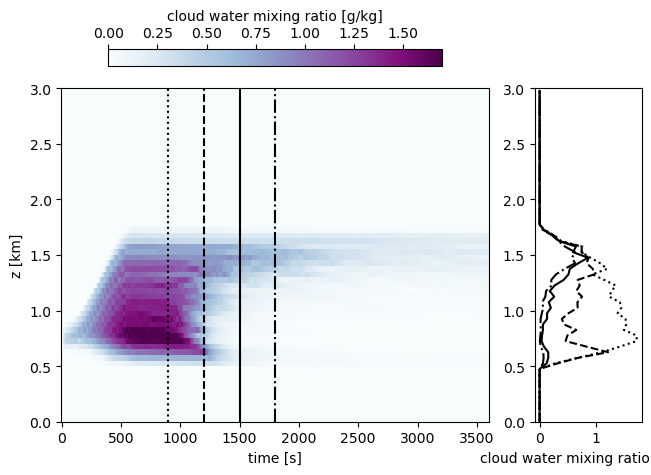

HTML(value="<a href='./qc_rhow=2_p=True.pdf' target='_blank'>./qc_rhow=2_p=True.pdf</a><br>")

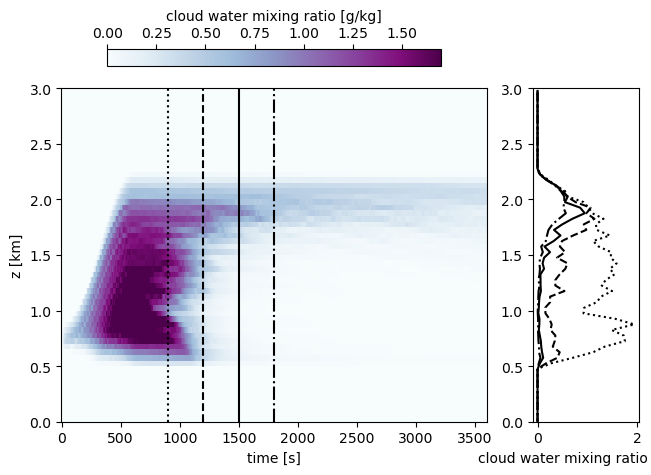

HTML(value="<a href='./qc_rhow=3_p=True.pdf' target='_blank'>./qc_rhow=3_p=True.pdf</a><br>")

In [4]:
for p in (False, True):
    for rho_times_w in (2, 3):
        plot(var='cloud water mixing ratio', qlabel='cloud water mixing ratio [g/kg]', fname=f'qc_rhow={rho_times_w}_p={p}.pdf',
             output=output[f'rhow={rho_times_w}.0_p={p}'], cmin= 0, cmax= 1.7)

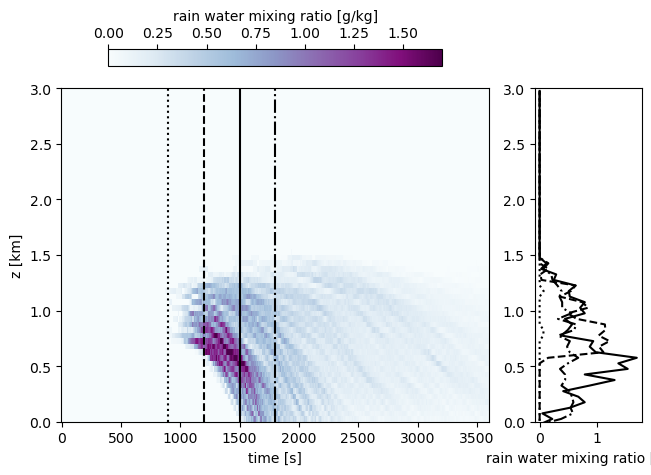

HTML(value="<a href='./qr_rhow=2_p=True.pdf' target='_blank'>./qr_rhow=2_p=True.pdf</a><br>")

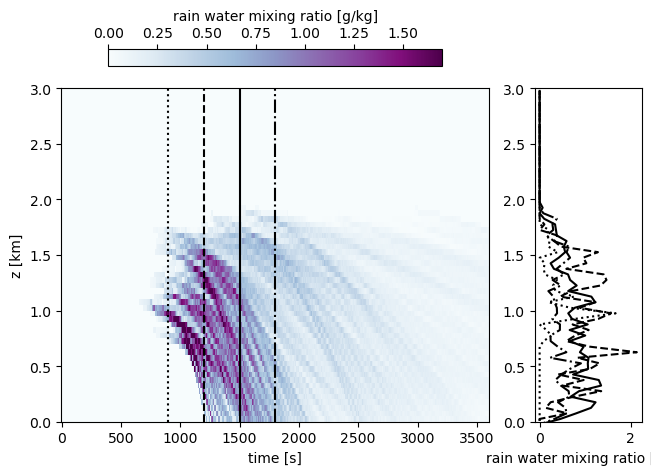

HTML(value="<a href='./qr_rhow=3_p=True.pdf' target='_blank'>./qr_rhow=3_p=True.pdf</a><br>")

In [5]:
p = True
for rho_times_w in (2, 3):
    plot(var='rain water mixing ratio', qlabel='rain water mixing ratio [g/kg]', fname=f'qr_rhow={rho_times_w}_p={p}.pdf',
         output=output[f'rhow={rho_times_w}.0_p={p}'], cmin= 0, cmax= 1.7)

In [6]:
for p in (False, True):
    for rho_times_w in (2, 3):
        key = f"rhow={rho_times_w}.0_p={p}"
        filename = 'products_' + key + '.nc'
        nc_exporter = NetCDFExporter_1d(output[key], settings[key], simulation[key], filename)
        nc_exporter.run()